In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading csv file on a dataframe

ar = pd.read_csv('AirQualityUCI.csv',sep=';')
ar.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
#Dropping CO(GT) and Unnamed columns
ar.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [6]:
#Formatting some object columns from strings to floats

ar.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    ar[i] = pd.to_numeric(ar[i],errors='coerce') 

In [7]:
#Replacing null data from -200 to NaN for posterior treatment

ar.replace(to_replace=-200,value=np.nan,inplace=True)

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


In [8]:
#Formatting Date and Time to datetime type

ar['Date'] = pd.to_datetime(ar['Date'],dayfirst=True) 

ar['Time'] = pd.to_datetime(ar['Time'],format= '%H.%M.%S' ).dt.time

ar.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [9]:
NMHC_ratio = ar['NMHC(GT)'].isna().sum()/len(ar['NMHC(GT)'])

print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

The NMHC(GT) sensor has 90.35% of missing data.


In [10]:
#Removing NMHC(GT) sensor due to amount of null values

ar.drop('NMHC(GT)', axis=1, inplace=True) 

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7718 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7715 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              8991 non-null   float64       
 11  RH             8991 non-null   float64       
 12  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 962.0+ KB


In [11]:
sns.set_theme(style="whitegrid")

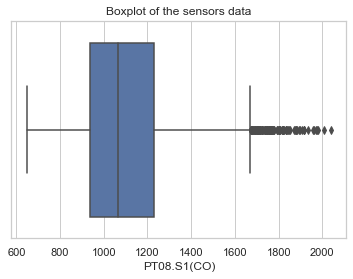

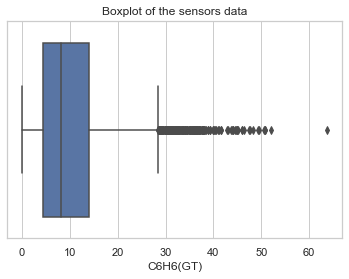

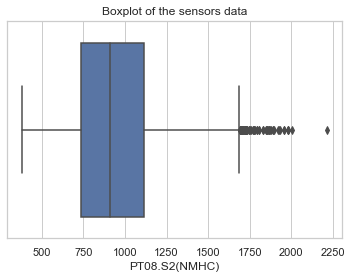

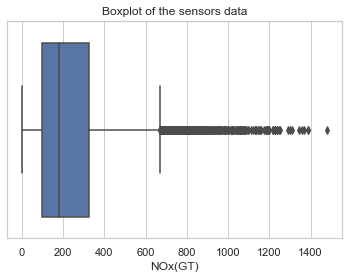

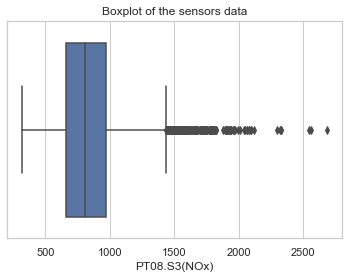

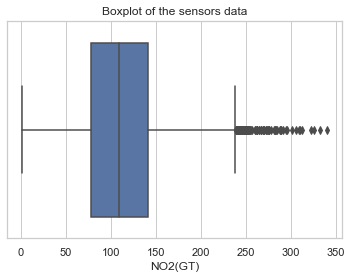

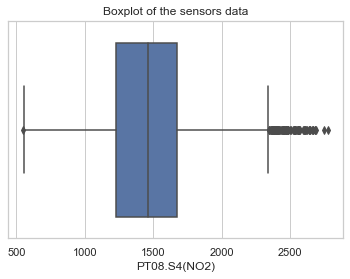

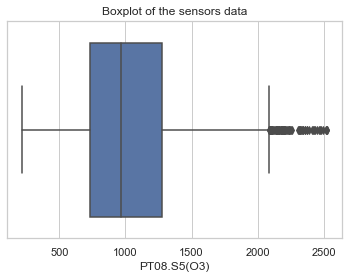

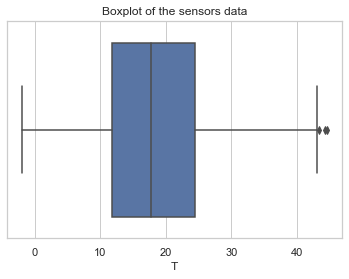

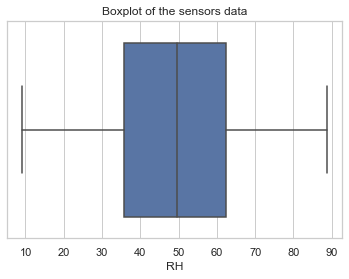

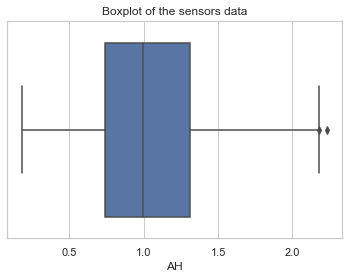

In [12]:
for i in ar.columns[2:13]:
    sns.boxplot(x=ar[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

In [13]:
#Removing Outliers with the Interquartile Range Method (IQR)

Q1 = ar.quantile(0.25) #first 25% of the data
Q3 = ar.quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 2 #For Normal Distributions, scale = 1.5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (ar[ar.columns[2:13]] < lower_lim)
upper_outliers = (ar[ar.columns[2:13]] > upper_lim)

In [14]:
#Checking the resulting outliers calculated by the above method (represented below as non-null values)

ar[ar.columns[2:13]][(lower_outliers | upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    30 non-null     float64
 1   C6H6(GT)       105 non-null    float64
 2   PT08.S2(NMHC)  13 non-null     float64
 3   NOx(GT)        244 non-null    float64
 4   PT08.S3(NOx)   114 non-null    float64
 5   NO2(GT)        32 non-null     float64
 6   PT08.S4(NO2)   20 non-null     float64
 7   PT08.S5(O3)    17 non-null     float64
 8   T              0 non-null      float64
 9   RH             0 non-null      float64
 10  AH             0 non-null      float64
dtypes: float64(11)
memory usage: 814.0 KB


In [15]:
#Create new DataFrame without the outliers

num_cols = list(ar.columns[2:13])
ar_out_IQR = ar[~((ar[num_cols] < (Q1 - 2 * IQR)) |(ar[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
ar_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8915 non-null   datetime64[ns]
 1   Time           8915 non-null   object        
 2   PT08.S1(CO)    8595 non-null   float64       
 3   C6H6(GT)       8595 non-null   float64       
 4   PT08.S2(NMHC)  8595 non-null   float64       
 5   NOx(GT)        7313 non-null   float64       
 6   PT08.S3(NOx)   8595 non-null   float64       
 7   NO2(GT)        7310 non-null   float64       
 8   PT08.S4(NO2)   8595 non-null   float64       
 9   PT08.S5(O3)    8595 non-null   float64       
 10  T              8595 non-null   float64       
 11  RH             8595 non-null   float64       
 12  AH             8595 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 987.5+ KB


In [16]:
#Removing NOx(GT) and NO2(GT) sensor data due the ammount of null values if compared to other sensors

pd.options.mode.chained_assignment = None
ar_out_IQR.drop(['NOx(GT)','NO2(GT)'],axis=1, inplace=True)
ar_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9470
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8915 non-null   datetime64[ns]
 1   Time           8915 non-null   object        
 2   PT08.S1(CO)    8595 non-null   float64       
 3   C6H6(GT)       8595 non-null   float64       
 4   PT08.S2(NMHC)  8595 non-null   float64       
 5   PT08.S3(NOx)   8595 non-null   float64       
 6   PT08.S4(NO2)   8595 non-null   float64       
 7   PT08.S5(O3)    8595 non-null   float64       
 8   T              8595 non-null   float64       
 9   RH             8595 non-null   float64       
 10  AH             8595 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 846.5+ KB


In [17]:
#Eliminating rows with NaN values 

ar_filt = ar_out_IQR.dropna(how='any', axis=0)
ar_filt.reset_index(drop=True,inplace=True)

In [18]:
ar_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8595 entries, 0 to 8594
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8595 non-null   datetime64[ns]
 1   Time           8595 non-null   object        
 2   PT08.S1(CO)    8595 non-null   float64       
 3   C6H6(GT)       8595 non-null   float64       
 4   PT08.S2(NMHC)  8595 non-null   float64       
 5   PT08.S3(NOx)   8595 non-null   float64       
 6   PT08.S4(NO2)   8595 non-null   float64       
 7   PT08.S5(O3)    8595 non-null   float64       
 8   T              8595 non-null   float64       
 9   RH             8595 non-null   float64       
 10  AH             8595 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 738.8+ KB


In [19]:
#Adding a column with the week days 

ar_filt['Week Day'] = ar_filt['Date'].dt.day_name() 

#Rearranging columns

cols = ar_filt.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:11]
ar_filt = ar_filt[cols]
ar_filt.head(10)

,Date,Week Day,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,Wednesday,18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,Wednesday,19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,Wednesday,20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,Wednesday,21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,Wednesday,22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10,Wednesday,23:00:00,1197.0,4.7,750.0,1337.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11,Thursday,00:00:00,1185.0,3.6,690.0,1462.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11,Thursday,01:00:00,1136.0,3.3,672.0,1453.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11,Thursday,02:00:00,1094.0,2.3,609.0,1579.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11,Thursday,07:00:00,1144.0,3.2,667.0,1490.0,1339.0,730.0,10.2,59.6,0.7417


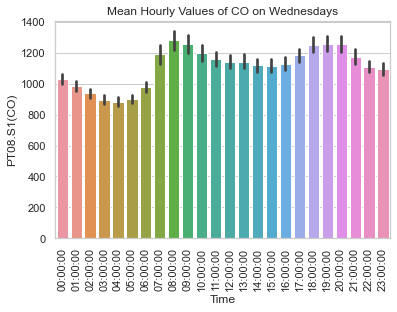

In [20]:
#Creating new dataframe with only wednesday data

ar_wed = ar_filt[ar_filt['Week Day'] == 'Wednesday']

#Plotting the mean hourly value of CO on Wednesdays

sns.barplot(x='Time',y='PT08.S1(CO)', data=ar_wed.sort_values('Time'))
plt.title('Mean Hourly Values of CO on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [21]:
#The peak concentration of CO in the city are between 8 AM and 9 AM and between 6 PM and 8 PM,
#beginnings and endings of office hours, respectively.

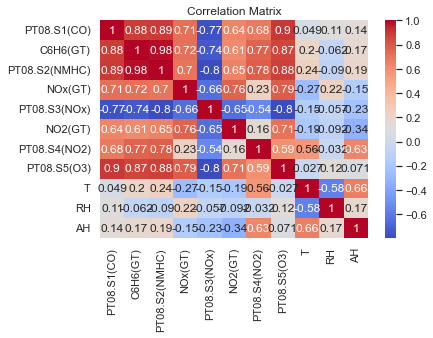

In [22]:
#Plotting correlation matrix

sns.heatmap(ar.corr(),annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
#Eliminating the C6H6(GT) for being a redundant sensor (the C6HC molecule is a Non-Methanic Hydrocarbon (NMHC)), so
#the correlation between those two sensor is exact

ar_filt.drop('C6H6(GT)', axis=1, inplace=True)

In [24]:
#Creating a Regression Model of the PT08.S1 sensor:

In [25]:
#Splitting the dataset in 80% for training and 20% for testing

from sklearn.model_selection import train_test_split

Y = ar_filt['PT08.S1(CO)'] #variável de predição
X = ar_filt.drop(['PT08.S1(CO)','Date', 'Time', 'Week Day'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(6876, 7) (1719, 7)


In [26]:
from sklearn.ensemble import RandomForestRegressor

modelo_randomforest = RandomForestRegressor(n_estimators=100)

modelo_randomforest.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
#Evaluating the results with the R² metric:

In [28]:
#Test data evaluation

from sklearn import metrics

pred_randomforest = modelo_randomforest.predict(X_test) #predicted CO concentrations

print('Random Forest Regression Model: R²={:.2f}'.format(metrics.r2_score(Y_test, pred_randomforest)))

Random Forest Regression Model: R²=0.92


In [29]:
from sklearn.svm import SVR
from sklearn import metrics

# Create an SVR object and specify hyperparameters
svr_model = SVR(kernel='rbf', C=1, gamma='auto')

# Train the SVR model on the training data
svr_model.fit(X_train, Y_train)

# Use the trained SVR model to predict on the test data
pred_svr = svr_model.predict(X_test)

# Compute the R-squared score of the SVR model
r2_svr = metrics.r2_score(Y_test, pred_svr)

print('SVR Regression Model: R²={:.2f}'.format(r2_svr))
 

SVR Regression Model: R²=-0.02


In [30]:
#Comparing model predictions with the Ground Truth Test Data

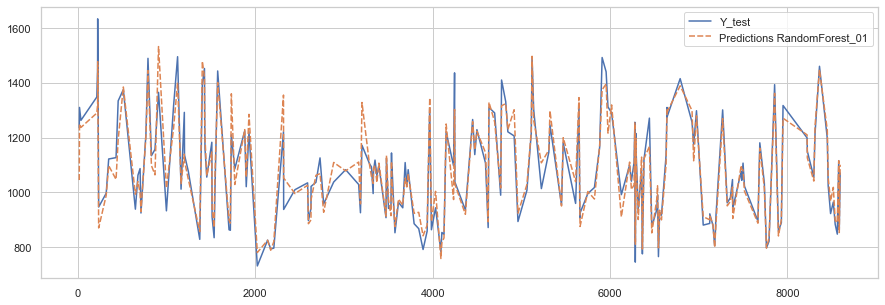

In [31]:
aux = pd.DataFrame()

aux['Y_test'] = Y_test
aux['Predictions RandomForest_01'] = pred_randomforest

plt.figure(figsize=(15,5))
sns.lineplot(data=aux.iloc[:200,:])
plt.show()

In [32]:
#Extracting season information from Date column:

def season(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

ar_filt['Season'] = ar_filt['Date'].map(season)
ar_filt.head(10)

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '21/03/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '20/06/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '21/06/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '22/09/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
C:\Users\vivek\anaconda3\lib\site-packages\panda

,Date,Week Day,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Season
0,2004-03-10,Wednesday,18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,winter
1,2004-03-10,Wednesday,19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,winter
2,2004-03-10,Wednesday,20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,winter
3,2004-03-10,Wednesday,21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,winter
4,2004-03-10,Wednesday,22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,winter
5,2004-03-10,Wednesday,23:00:00,1197.0,750.0,1337.0,1393.0,949.0,11.2,59.2,0.7848,winter
6,2004-03-11,Thursday,00:00:00,1185.0,690.0,1462.0,1333.0,733.0,11.3,56.8,0.7603,winter
7,2004-03-11,Thursday,01:00:00,1136.0,672.0,1453.0,1333.0,730.0,10.7,60.0,0.7702,winter
8,2004-03-11,Thursday,02:00:00,1094.0,609.0,1579.0,1276.0,620.0,10.7,59.7,0.7648,winter
9,2004-03-11,Thursday,07:00:00,1144.0,667.0,1490.0,1339.0,730.0,10.2,59.6,0.7417,winter


In [33]:
#Creating categorical features from Season column and splitting new dataframe

Y_2 = ar_filt['PT08.S1(CO)']
X_2 = ar_filt.drop(['PT08.S1(CO)','Date', 'Time', 'Week Day'], axis=1)
X_2 = pd.get_dummies(data=X_2)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)
X_2.head()

,PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Season_autumn,Season_spring,Season_summer,Season_winter
0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,0,0,0,1
1,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,0,0,0,1
2,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,0,0,0,1
3,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,0,0,0,1
4,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,0,0,0,1


In [34]:
modelo_randomforest_2 = RandomForestRegressor()

modelo_randomforest_2.fit(X_2_train, Y_2_train)

RandomForestRegressor()

In [35]:
pred_randomforest_2 = modelo_randomforest_2.predict(X_2_test)

print('Regression Model without Seasons: R²={:.2f}'.format(metrics.r2_score(Y_test, pred_randomforest)))
print('Regression Model with Seasons: R²={:.2f}'.format(metrics.r2_score(Y_2_test, pred_randomforest_2)))

Regression Model without Seasons: R²=0.92
Regression Model with Seasons: R²=0.94


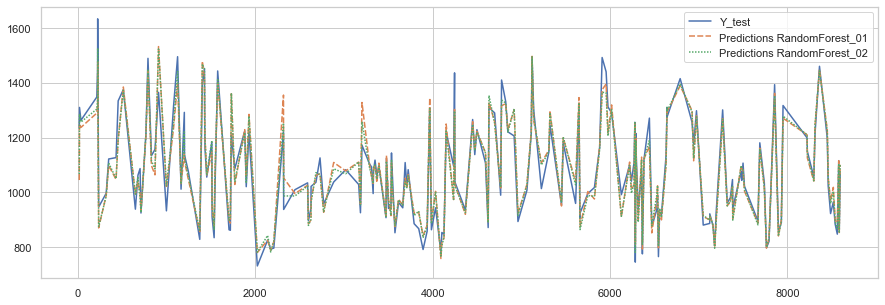

In [36]:
aux['Predictions RandomForest_02'] = pred_randomforest_2

plt.figure(figsize=(15,5))
sns.lineplot(data=aux.iloc[:200,:])
plt.show()

In [37]:
#It can be seen that the new model used the new information to react slightly better to abrupt changes 
#in the predicted variable.